# Assignment 4

Question 1(a):- Read the annotation csv file. How many unique classes of object are present in the two
images?

In [ ]:
pip install opencv-python

In [41]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [42]:
annotation=pd.read_csv('ques1_data/ques1_annotation.csv') # here we read the annotation file 
annotation


,filename,class,x,y,width,height
0,car_tent.jpg,tent,0,392,198,148
1,car_tent.jpg,car,294,372,375,151
2,dog.jpg,truck,473,71,216,101
3,dog.jpg,dog,134,219,179,324
4,dog.jpg,bicycle,125,129,446,293


In [43]:
unique_class= np.unique(annotation['class']) #here we find te unique element of the class
print(unique_class)
print("The number of unique class= ",len(unique_class)) # here we print the no. of element in the class

['bicycle' 'car' 'dog' 'tent' 'truck']
The number of unique class=  5


Question 1(b):- Extract all objects present in the two images based on the position of the objects
provided in the annotation file. Save all object images that you have extracted. Do not
extract objects manually. You should be using “for” loop or such for extracting and saving
all objects. You can use any naming convention for the filenames of the extracted objects.


In [45]:
for i, row in annotation.iterrows():
    img = cv2.imread('ques1_data/'+row['filename'])
    file = img[row['y']:row['y']+row['height'],row['x']:row['x']+row['width'],:]
    cv2.imwrite((row['class']+'_'+str(i)+'.jpg'),file)

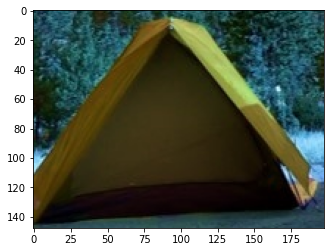

In [6]:
tent_0 = cv2.imread('tent_0.jpg')
plt.imshow(tent_0)

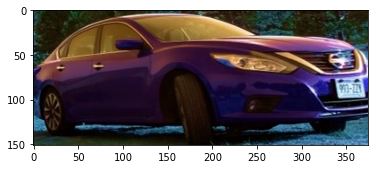

In [7]:
car_1 = cv2.imread('car_1.jpg')
plt.imshow(car_1)

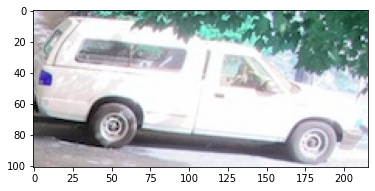

In [8]:
truck_2 = cv2.imread('truck_2.jpg')
plt.imshow(truck_2)

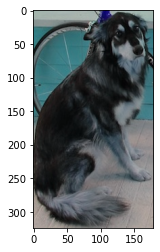

In [9]:
dog_3 = cv2.imread('dog_3.jpg')
plt.imshow(dog_3)

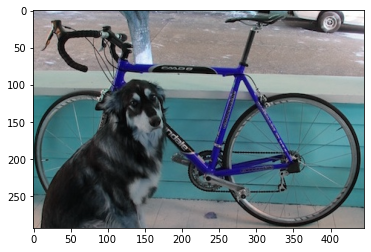

In [10]:
bicycle_4 = cv2.imread('bicycle_4.jpg')
plt.imshow(bicycle_4)

Question 1(c):- Display the “tent” object from “car_tent.jpg” and “bicycle” object from “dog.jpg” in
your jupyter notebook.

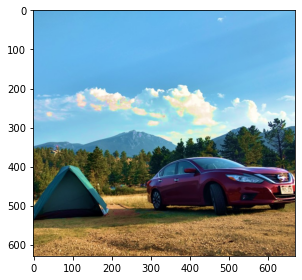

In [11]:
car_tent = cv2.imread('ques1_data/car_tent.jpg') # here read the car_tent image
car_tent.shape # here we find the shape of car_tent
car_tent = cv2.cvtColor(car_tent, cv2.COLOR_BGR2RGB) # here we convert the image from BGR to RGB
plt.imshow(car_tent) # here we show the image
plt.tight_layout()

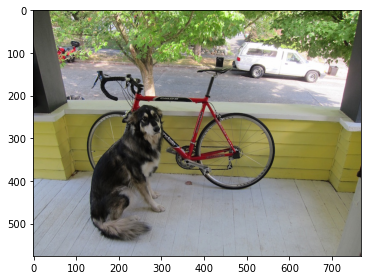

In [12]:
dog= cv2.imread("ques1_data/dog.jpg") #here read the dog image
dog.shape
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)
plt.imshow(dog)
plt.tight_layout()

(148, 198, 3)


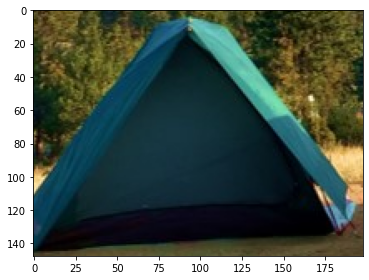

In [13]:
tent = car_tent[392:392+148,0:0+198,:] # here we extract the tent image on the basis of dimension 
print(tent.shape)
plt.imshow(tent)
plt.tight_layout()

(293, 446, 3)


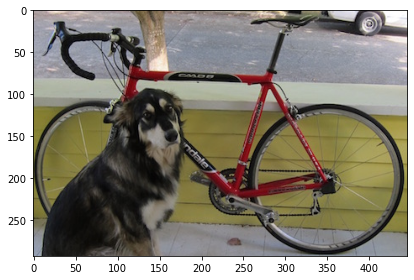

In [14]:
cycle = dog[129:129+293,125:125+446,:] #here we extract the cycle image on the basis of dimension 
print(cycle.shape)
plt.imshow(cycle)
plt.tight_layout()

Question 2(a):- Read both the data files “threshold_data.csv” and “segment_data.csv”. Merge the two files based
on the “Code” column. You will use this merged dataframe for the remaining question.

In [15]:
threshold=pd.read_csv('ques2_data/threshold_data.csv') #here we read the threshold_data csv file
segment=pd.read_csv('ques2_data/segment_data.csv')#here we read the segment_data csv file
merge_df= pd.merge(threshold,segment,on='Code') # here we merge both file
merge_df

,Code,Time,Speed,Road,Direction,Mileage
0,5032426,0,55.00,I-235,EB,12.937880
1,5032426,1,43.00,I-235,EB,12.937880
2,5032426,2,42.75,I-235,EB,12.937880
3,5032426,3,53.00,I-235,EB,12.937880
4,5032426,100,46.00,I-235,EB,12.937880
...,...,...,...,...,...,...
6809,5033376,2203,59.00,I-235,EB,1.277982
6810,5033376,2300,55.75,I-235,EB,1.277982
6811,5033376,2301,57.00,I-235,EB,1.277982
6812,5033376,2302,44.00,I-235,EB,1.277982


Question 2(b):-Convert any values of threshold speed greater than 45 mph to 45 mph and any values of threshold
speed less than 0 mph to 0 mph i.e., the modified maximum and minimum value of threshold speed in
the merged dataframe will be 45 mph and 0 mph respectively.

In [18]:
for i in merge_df.index:
    if merge_df.iloc[i,2]>45: # here we check the value of speed>45  
        merge_df.iloc[i,2]=45 # here we assign the value of 45 if greater than 45
    elif merge_df.iloc[i,2]<0: # here we check the value of speed<0 
        merge_df.iloc[i,2]=0# here we assign the value of 0 if less than 0
merge_df
        

,Code,Time,Speed,Road,Direction,Mileage
0,5032426,0,45.00,I-235,EB,12.937880
1,5032426,1,43.00,I-235,EB,12.937880
2,5032426,2,42.75,I-235,EB,12.937880
3,5032426,3,45.00,I-235,EB,12.937880
4,5032426,100,45.00,I-235,EB,12.937880
...,...,...,...,...,...,...
6809,5033376,2203,45.00,I-235,EB,1.277982
6810,5033376,2300,45.00,I-235,EB,1.277982
6811,5033376,2301,45.00,I-235,EB,1.277982
6812,5033376,2302,44.00,I-235,EB,1.277982


Question 2(c):- Filter the merged dataframe for Road = ‘I-235’ and Direction = ‘WB’

In [19]:
new_merge_df=merge_df[(merge_df.Road=='I-235') & (merge_df.Direction=='WB')] 
#extract the dataframe which have Road I-235 and Direction WB
new_merge_df


,Code,Time,Speed,Road,Direction,Mileage
96,5032428,0,45.0,I-235,WB,0.676521
97,5032428,1,45.0,I-235,WB,0.676521
98,5032428,2,45.0,I-235,WB,0.676521
99,5032428,3,45.0,I-235,WB,0.676521
100,5032428,100,45.0,I-235,WB,0.676521
...,...,...,...,...,...,...
6617,5033373,2203,45.0,I-235,WB,12.491597
6618,5033373,2300,35.5,I-235,WB,12.491597
6619,5033373,2301,45.0,I-235,WB,12.491597
6620,5033373,2302,45.0,I-235,WB,12.491597


Question 2(d):-Use only 3 columns ‘Distance’, ‘Time’, and ‘Speed’ and then pivot table such that the columns
represent ‘Time’, rows indicate ‘Distance’, the values represent ‘Speed’. Use ‘Distance’ as index
column and this pivot dataframe should be sorted based on the distance.

In [20]:
df=merge_df.drop_duplicates(["Mileage","Time"])  
df1=df.pivot(index="Mileage", columns='Time', values="Speed") # here we pivot the dataframe according to the given format
df1

Time,0,1,2,3,100,101,102,103,200,201,...,2102,2103,2200,2201,2202,2203,2300,2301,2302,2303
Mileage,,,,,,,,,,,,,,,,,,,,,
0.000000,43.75,43.0,45.0,45.00,45.0,45.0,45.0,45.0,45.0,45.0,...,40.0,45.0,45.00,45.0,45.0,45.0,45.0,32.0,45.0,45.0
0.509586,45.00,40.0,45.0,44.25,45.0,45.0,45.0,45.0,45.0,45.0,...,45.0,45.0,45.00,45.0,42.0,45.0,45.0,45.0,45.0,45.0
0.676521,45.00,45.0,45.0,45.00,45.0,45.0,45.0,45.0,45.0,45.0,...,43.0,45.0,45.00,45.0,45.0,45.0,45.0,45.0,45.0,45.0
0.891268,35.00,29.0,45.0,45.00,0.0,45.0,0.0,45.0,45.0,45.0,...,45.0,45.0,45.00,45.0,45.0,45.0,45.0,45.0,42.0,45.0
1.277982,33.00,40.0,45.0,45.00,0.0,0.0,45.0,45.0,45.0,45.0,...,45.0,45.0,45.00,45.0,45.0,45.0,45.0,45.0,44.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13.112941,45.00,45.0,45.0,45.00,42.5,28.0,42.0,45.0,0.0,45.0,...,45.0,45.0,42.75,45.0,45.0,45.0,42.5,45.0,40.0,42.0
13.456991,45.00,45.0,45.0,45.00,45.0,36.0,42.0,45.0,43.5,43.0,...,38.5,45.0,45.00,45.0,45.0,45.0,37.0,45.0,33.0,45.0
13.656730,40.00,40.0,38.0,45.00,0.0,45.0,45.0,45.0,42.0,42.0,...,45.0,45.0,45.00,45.0,42.0,45.0,45.0,45.0,39.0,45.0


[[43.75 43.   45.   ... 32.   45.   45.  ]
 [45.   40.   45.   ... 45.   45.   45.  ]
 [45.   45.   45.   ... 45.   45.   45.  ]
 ...
 [40.   40.   38.   ... 45.   39.   45.  ]
 [45.   39.   45.   ... 45.   41.   28.  ]
 [45.   45.    2.   ... 45.   45.   45.  ]]


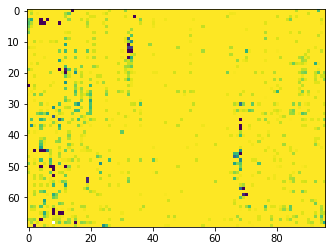

In [21]:
df2 = df1.values
print(df2)
plt.imshow(df2) # here we print the image from matrix df2

Question 2(e):-Apply medianBlur filter to this matrix to denoise the image with kernel window size 3. Note, you
need to convert the matrix to ‘float32’ type before applying the median filter. Plot this denoise matrix
as an image and show in jupyter notebook. Comment whether applying filter has been able to remove
noise in the image or not.

float32


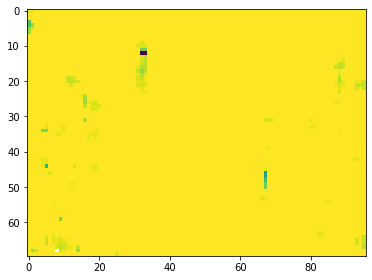

In [29]:
df2 = df2.astype(np.float32) # here we convert into float32
print(df2.dtype)
medianblur_df= cv2.medianBlur(df2,3)
plt.imshow(medianblur_df)
plt.tight_layout()

Yes, applying filter has been able to remove noise in the image.